# Lista 2
### NCG-040 - Introdução à Visão Computacional

**Instruções:**

 1. Comentários nos códigos desenvolvidos.
 1. Caso exista uma pergunta, deve ser respondida como comentários no arquivo ou em uma nova célula de texto.
 1. Digitar seu nome e DRE abaixo.
 1. Ao finalizarem a lista, renomeie ou salve uma cópia do arquivo no formato NomeSobrenome_ListaX.ipynb
 1. Enviar via Dropbox até 21/05/2025 - https://www.dropbox.com/request/Duz3Wq2nsdIYQVp7PVvH

---


`Nome: ` Diego Vasconcelos Schardosim de Matos

`DRE: ` 120098723

### 0) Setup

Para esta lista, vamos usar o Numpy, PyPlot, OpenCV e Random. Use a célula abaixo para importar as bibliotecas.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

A célula abaixo baixa as imagens que iremos utilizar nessa lista, são elas:


* Lena - lena.png   
* Tabuleiro de Xadrez - xadrez.png
* Grid de círculos - circlesgrid.jpg



In [27]:
!wget -O lena.png https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
!wget -O xadrez.jpg https://st2.depositphotos.com/4708565/7132/v/380/depositphotos_71321153-stock-illustration-illustration-with-chess-board-background.jpg
!wget -O circlesgrid.jpg https://i.stack.imgur.com/qNsTz.jpg
!wget -O moedas.png https://i.stack.imgur.com/PzB9I.png

# Imagem no notebook original está fora do ar, escolhi uma diferente
!wget -O oleo.jpg https://globalvoices.org/wp-content/uploads/2011/11/Bacia-de-Campos.jpg

--2025-05-20 12:50:10--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 462.73K  2.96MB/s    in 0.2s    

2025-05-20 12:50:11 (2.96 MB/s) - ‘lena.png’ saved [473831/473831]

--2025-05-20 12:50:11--  https://st2.depositphotos.com/4708565/7132/v/380/depositphotos_71321153-stock-illustration-illustration-with-chess-board-background.jpg
Resolving st2.depositphotos.com (st2.depositphotos.com)... 23.8.79.154
Connecting to st2.depositphotos.com (st2.depositphotos.com)|23.8.79.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11830 (12K) [image/jpeg]
Saving to: ‘xadrez.jpg’

xadrez.jpg          100%[=========

### 1) Detecção de bordas

As operações de detecção de bordas são bastante úteis na segmentação de imagens, pois facilita a identificação de objetos através de visão computacional.

Existem diversas formas de detectar bordas, a mais conhecida é o método de Canny Edge Detection

a) Na célula abaixo, carregue a imagem lenna.png dentro de um novo array com a função imread do OpenCV

b) Em seguida, crie uma nova célula, crie uma cópia da imagem aplicando Canny Edge Detection e plote o resultado em escala de cinza.

c) Por fim, em uma nova célula, aplique os tipos de thresholding que vimos em sala, criando uma cópia para cada, em cima da imagem em que foi aplicada a técnica Canny.

d) Plote e Comente os resultados. Qual versão teve as bordas mais visíveis? Qual você acha que é mais fácil para a detectar, em termos computacionais? Discutiremos isso em sala.

Dica: Utilize subplot do PyPlot para plotar os resultados usando apenas uma célula.

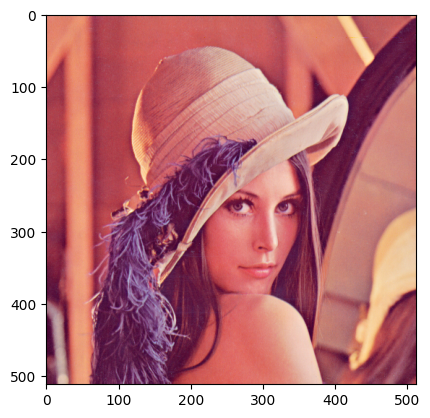

In [28]:
# Letra a)
lena = cv2.imread('lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_RGB2BGR)
plt.imshow(lena)

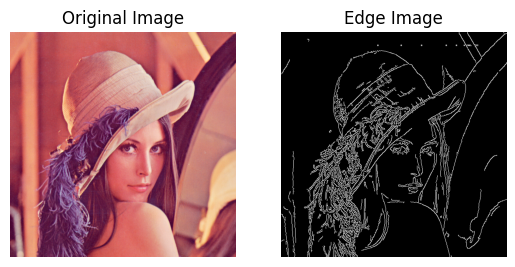

In [29]:
# Letra b)

lena_copy = lena.copy()
edges = cv2.Canny(lena_copy, 100, 200)

fig, axes = plt.subplots(nrows=1, ncols=2)
axes = axes.flatten()
axes[0].imshow(lena_copy,cmap = 'gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(edges,cmap = 'gray')
axes[1].set_title('Edge Image')
axes[1].axis('off')

plt.show()

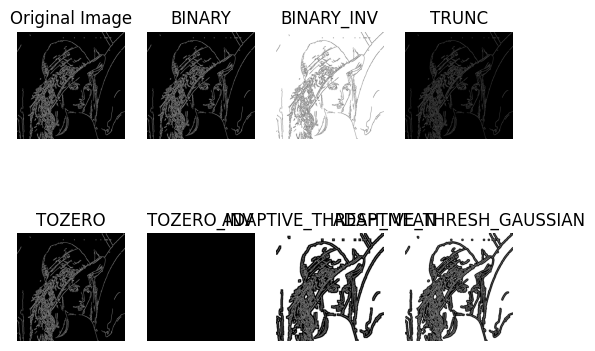

In [30]:
# Letra c)

ret,thresh1 = cv2.threshold(edges,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(edges,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(edges,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(edges,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(edges,127,255,cv2.THRESH_TOZERO_INV)
thresh6 = cv2.adaptiveThreshold(edges,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
thresh7 = cv2.adaptiveThreshold(edges,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV', 'ADAPTIVE_THRESH_MEAN', 'ADAPTIVE_THRESH_GAUSSIAN']
images = [edges, thresh1, thresh2, thresh3, thresh4, thresh5, thresh6, thresh7]

fig, axes = plt.subplots(nrows=2, ncols=4)
axes = axes.flatten()
for i in range(8):
    axes[i].imshow(images[i],'gray',vmin=0,vmax=255)
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.show()

Letra d)

Aplicando as 7 técnicas de thresholding em cima da imagem que foi aplicada Canny tivemos metade dos resultados parecido com a original (Canny) e o restante bem diferente. Para mim o método de binarização inversa é mais fácil de identificar as bordas pelo contraste com o fundo branco, mas isso não deve ser relevante para o computador.

Já os tres últimos métodos é como se as bordas tivessem ganhado espessura e sobrepos com outras bordas, sendo difícil de identificar detalhes mais finos.

### 2) Detecção de Cantos

As operações de de detecção de canto do tipo Harris e Shi-Tomasi são úteis para a visão computacional e funcionam varrendo uma imagem em busca de mudanças significativas de direção em todas a direções.

a) Faça uma cópia da imagem xadrez.jpg e aplique o algoritmo Harris. Plote o resultado como vimos em sala.

b) Faça uma cópia da imagem xadrez.jpg e aplique o algoritmo Shi-Tomasi. Plote o resultado como vimos em sala.

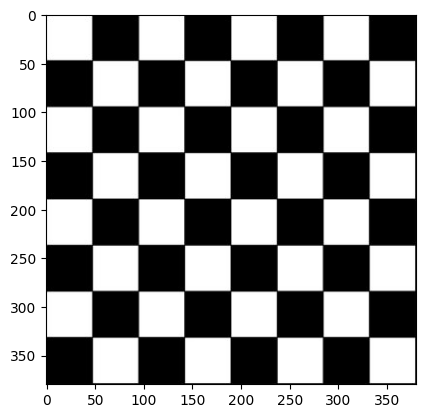

In [31]:
# Letra a)

xadrez_harris = cv2.imread('xadrez.jpg')
xadrez_harris = cv2.cvtColor(xadrez_harris, cv2.COLOR_RGB2BGR)
plt.imshow(xadrez_harris)

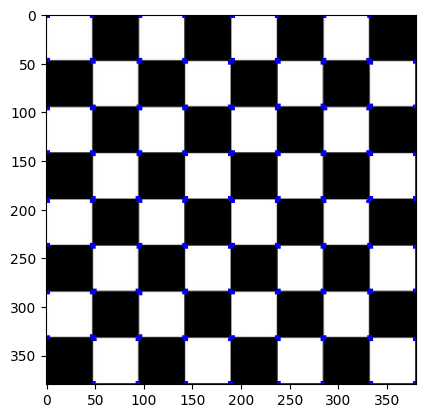

In [32]:
xadrez_harris_gray = cv2.cvtColor(xadrez_harris,cv2.COLOR_RGB2GRAY)
xadrez_harris_gray = np.float32(xadrez_harris_gray)
xadrez_harris_dst = cv2.cornerHarris(src=xadrez_harris_gray,blockSize=2,ksize=3,k=0.04)

#result is dilated for marking the corners, not important
xadrez_harris_dst = cv2.dilate(xadrez_harris_dst,None)

# Threshold for an optimal value, it may vary depending on the image.
xadrez_harris[xadrez_harris_dst>0.01*xadrez_harris_dst.max()]=[0,0,255]

plt.imshow(xadrez_harris)

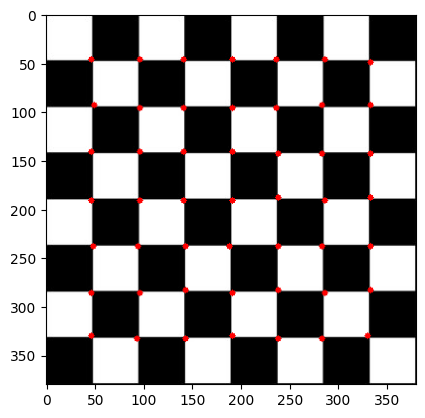

In [33]:
# Letra b)

xadrez_shi = cv2.imread('xadrez.jpg')
xadrez_shi = cv2.cvtColor(xadrez_shi, cv2.COLOR_RGB2BGR)
xadrez_shi_gray = cv2.cvtColor(xadrez_shi,cv2.COLOR_RGB2GRAY)

corners = cv2.goodFeaturesToTrack(xadrez_shi_gray,49,0.01,10)

for i in corners:
  x,y = i.ravel()
  cv2.circle(xadrez_shi, (int(x), int(y)), 3, 255, -1)

plt.imshow(xadrez_shi)

### 3) Detecção de Grid

Além das técnicas de detecção de cantos, temos também a detecção de padrões em Grid, técnica bem eficiente e utilizada principalmente para a calibração de câmeras, rastreamento de objetos, aplicações em realidade aumentada, entre outras.

a) Crie uma cópia da imagem xadrez.jpg e aplique Grid Detection do tipo "Chessboard Corners" e plote o resultado.

b) Crie uma cópia da imagem circlesgrid.jpg e aplique Grid Detection do tipo "Circles Grid" e plote o resultado.


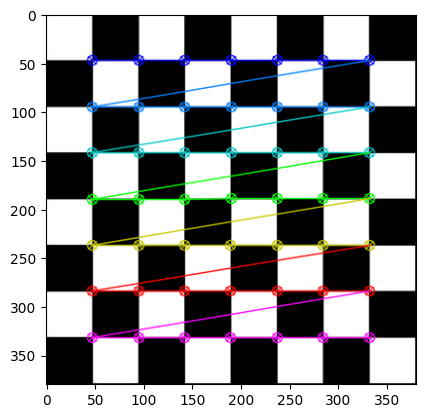

In [34]:
# Letra a)

xadrez_grid = cv2.imread("xadrez.jpg")
found1, corner1 = cv2.findChessboardCorners(xadrez_grid,(7,7))
cv2.drawChessboardCorners(xadrez_grid,(7,7),corner1,found1)
plt.imshow(xadrez_grid)

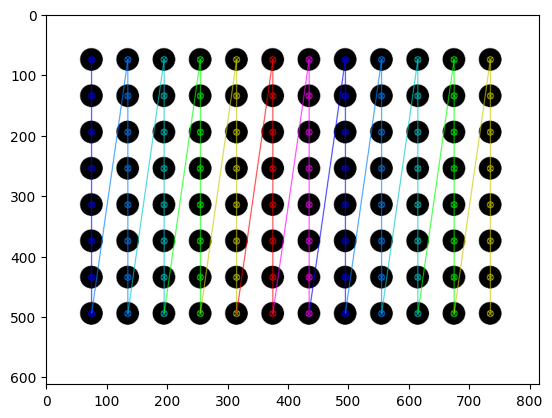

In [35]:
# Letra b)

circles_grid = cv2.imread("circlesgrid.jpg")
found2, corner2 = cv2.findCirclesGrid(circles_grid,(8,12),cv2.CALIB_CB_FAST_CHECK)
cv2.drawChessboardCorners(circles_grid,(8,12),corner2,found2)
plt.imshow(circles_grid)

### 4) Detecção de Contornos

Nas operações de detecção de contornos podemos detectar as bordas de objetos e localizá-los facilmente em uma imagem, é comumente o primeiro passo em muitas aplicações interessantes, como a segmentação de imagem, detecção e reconhecimento de objetos.

Neste exercício, você poderá usar qualquer imagem, mas recomendamos a imagem óleo.jpg para demonstrar a técnica de detecção de contornos em uma aplicação no mundo real, na identificação de manchas de óleo.

a) Crie uma cópia da imagem e converta para escala de cinza

b) Dependendo da imagem, aplique uma combinação de Canny, blur e thresholding até chegar em uma versão mais simplificada da imagem onde os contornos possam ser facilmente identificados.

c) Ache os contornos

d) Desenhe os contornos em cima da imagem original

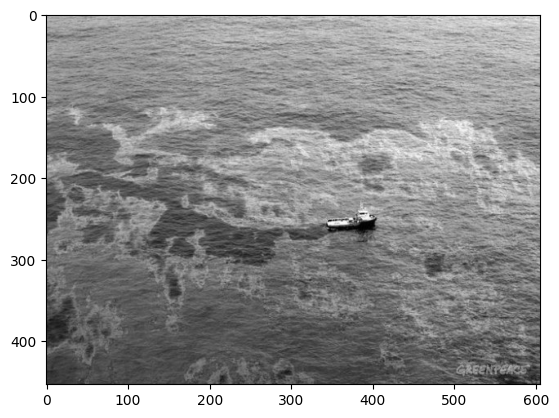

In [36]:
# Letra a)

oleo_original = cv2.imread('oleo.jpg')
oleo = cv2.cvtColor(oleo_original, cv2.COLOR_BGR2GRAY)
plt.imshow(oleo, cmap='gray')

<ipython-input-37-a727afac6168>:5: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(oleo.ravel(),256,[0,256]);


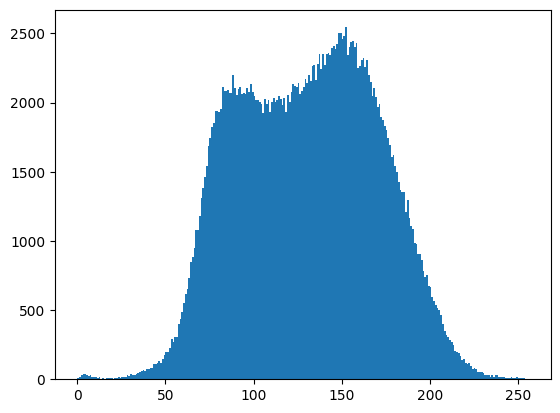

In [37]:
"Analisando a distribuição das cores para tentar identificar classes"

# Letra b)

plt.hist(oleo.ravel(),256,[0,256]);
plt.show()

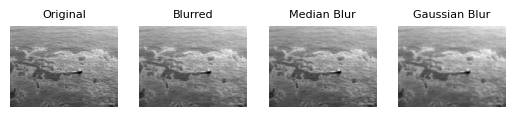

In [38]:
"Aplicando filtros para tentar destacar as bordas"

blur = cv2.blur(oleo,(5,5))
medianBlur = cv2.medianBlur(oleo,5)
gaussianBlur = cv2.GaussianBlur(oleo, (15, 15), 0)

titles = ['Original', 'Blurred', 'Median Blur', 'Gaussian Blur']
images = [oleo, blur, medianBlur, gaussianBlur]

fig, axes = plt.subplots(nrows=1, ncols=4)
axes = axes.flatten()

for i in range(4):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].set_title(titles[i], fontsize=8)
    axes[i].axis('off')

plt.show()

<ipython-input-39-f33d730b674c>:5: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[i].hist(images[i].ravel(),256,[0,256]);


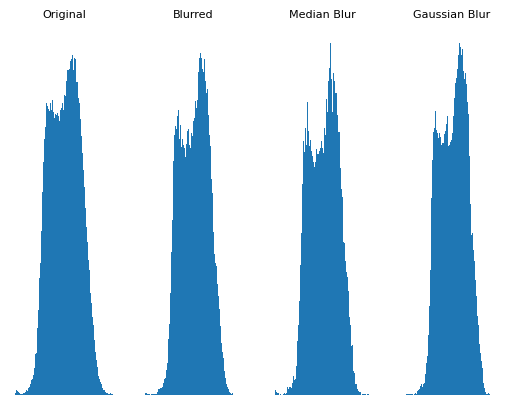

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=4)
axes = axes.flatten()

for i in range(4):
    axes[i].hist(images[i].ravel(),256,[0,256]);
    # axes[i].imshow(images[i], cmap='gray')
    axes[i].set_title(titles[i], fontsize=8)
    axes[i].axis('off')

plt.show()

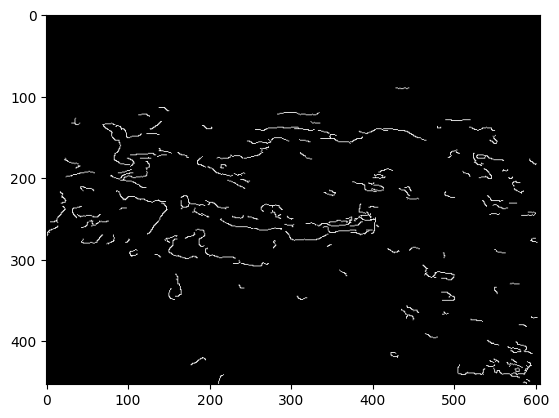

In [40]:
"O filtro Median Blur aparentar ter melhor distinção entre as classes"
edges = cv2.Canny(medianBlur,100,200)
plt.imshow(edges,cmap = 'gray')

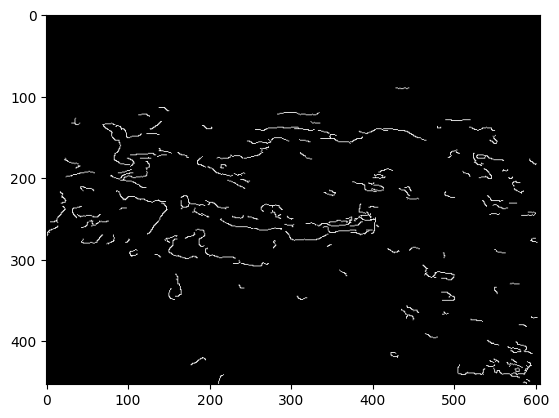

In [41]:
ret1,th1 = cv2.threshold(edges,127,255,cv2.THRESH_BINARY)
plt.imshow(th1, cmap='gray')

In [42]:
# Letra c)

contours, hierarchy = cv2.findContours(th1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

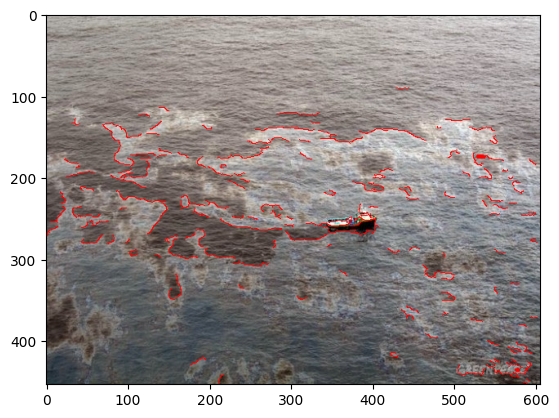

In [43]:
# Letra d)

for i in range(len(contours)):

  if hierarchy[0][i][3] == -1:
    cv2.drawContours(oleo_original,contours,i,255,-1)

plt.imshow(oleo_original)